# Project III - Home Credit Default Risk

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

In [4]:
!pip install category_encoders

little trick so that sci kit learn works faster:


In [5]:
!pip install seaborn


In [6]:
!pip install scikit-learn-intelex

from sklearnex import patch_sklearn
patch_sklearn()


     ---------------------------------------- 98.3/98.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 22.2/22.2 MB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 75.9/75.9 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 278.1/278.1 kB 4.3 MB/s eta 0:00:00



KeyboardInterrupt



In [24]:
# Basic operation labaries:
import numpy              as np
import pandas             as pd
# Data visualization:
import matplotlib.pyplot        as plt
import seaborn                  as     sns

import IPython.display    

# Data cleansing:
from sklearn.impute import SimpleImputer

# Machine learning:
#  Regressors:
from sklearn.linear_model     import LogisticRegression
from sklearn.linear_model     import SGDRegressor
from sklearn.tree             import DecisionTreeRegressor

# Classifiers:
from sklearn.ensemble         import RandomForestClassifier
from sklearn.datasets         import make_classification

# splitting data:
from sklearn.model_selection  import train_test_split

# Features numeric normalization:
from sklearn.preprocessing    import StandardScaler, MinMaxScaler

# Features categorical normalization:  
from sklearn.preprocessing    import OneHotEncoder
from sklearn.preprocessing    import LabelEncoder

# model metric evaluation:
from sklearn.metrics          import mean_absolute_error
from sklearn.metrics          import confusion_matrix
from sklearn.metrics          import precision_score
from sklearn.metrics          import recall_score
from sklearn.metrics          import f1_score
from sklearn.metrics          import accuracy_score
from sklearn.metrics          import RocCurveDisplay

# tyding up the code (in the future):
from sklearn.pipeline         import make_pipeline

# visualizing results:
from sklearn.metrics          import fbeta_score, make_scorer
from sklearn.model_selection  import learning_curve

# For the future, hyperparameths selector:
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection  import RandomizedSearchCV
 
 


### Getting the data

We downloaded the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). 

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

For now we only use: "application_train.csv" and "application_test.csv".

In [8]:
df_train = pd.read_csv('application_train.csv.zip', encoding='ISO-8859–1')
df_test  = pd.read_csv('application_test.csv.zip', encoding='ISO-8859–1')

### Exploratory Data Analysis

It is imoprtant to make sure we understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

The shape of the training and test datasets.

In [9]:
print(df_train.shape)
print(df_test.shape)

(307511, 122)
(48744, 121)


Train Set -  rows: 307511  columns: 122

Test  Set -  rows: 48744  columns: 121

The Test set don't have the target column.

List all columns in the train dataset

In [76]:
print(df_train.columns.values)
print(df_test.columns.values)

['CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE'
 'FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE'
 'FLAG_PHONE' 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_AVG'
 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG' 'LIVINGAREA_AVG'
 'NONLIVINGAPARTMENTS_AVG' 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE'
 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE'
 'COMMONAREA_MODE' 'ELEVATORS_MODE' 'ENTRAN

Now we are gonna show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows. 
It's importan to take our time to review what kind of information you can gather from this data.

In [ ]:
# We create the df_info dataframe. In this table we got every train/test festure as a row. 
# And Each column has information about that features.
df_info = df_train.T

df_info.shape
df_info['dtypes'] = df_train.dtypes
df_info.shape
df_info['Min'] = df_train.min()
df_info['Max'] = df_train.max()
df_info['cant_unique'] = df_train.nunique()
df_info = df_info[['dtypes','Min', 'Max','cant_unique']]

C:\Users\User\AppData\Local\Temp\ipykernel_5908\3534913225.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_info['Min'] = df_train.min()
C:\Users\User\AppData\Local\Temp\ipykernel_5908\3534913225.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_info['Max'] = df_train.max()


In [ ]:
result = df_train.loc[[0,1,2,3,4], :]
result = result.T
# with the following we can visualize all the information:
IPython.display.HTML(result.to_html())

Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

In [ ]:
# Because the logo of the company is red, lets set the color palette in red:
sns.set_palette('Reds')

In [ ]:
target_0 = df_train[df_train["TARGET"] == 0]
target_1 = df_train[df_train["TARGET"] == 1]


print(f'\033[94mNumber of people who didnt get the loan: {len(target_0)}')
print(f'\033[94mNumber of people who get the loan: {len(target_1)}')


Number of people who didnt get the loan: 282686
Number of people who get the loan: 24825


[Text(0.5, 1.0, 'Train set Target distribution')]

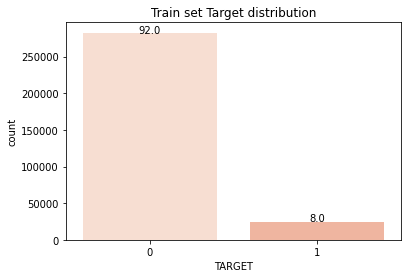

In [ ]:
%matplotlib inline
ax  = sns.countplot(data = df_train , x="TARGET")
per = [(len(target_0)/len(df_train))*100 , (len(target_1)/len(df_train))*100]

patches = ax.patches

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate(round(per[i],0), (x, y), ha='center')

ax.set(title="Train set Target distribution")

Lets see the number of columns of each data type

In [ ]:
freq = df_info['dtypes'].value_counts() 
print(freq) 
cant_num = freq[0] + freq[1]
cant_cat = freq[2]
print('We got ', cant_num, ' numerical features and ',cant_cat, ' categorial features')


float64    65
int64      41
object     16
Name: dtypes, dtype: int64
We got  106  numerical features and  16  categorial features


For categorical variables, show the number of distinct values in each column (number of labels)

In [ ]:
cat_features = [i for i in df_train.columns if df_train.dtypes[i]=='object']
df_cat = df_train[cat_features]
print ( df_cat.nunique() )



NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

In [ ]:
df_info ['percentage'] = round(df_train.isnull().sum() * 100 / len(df_train),2)
df_percentages = df_info.sort_values(by='percentage', ascending = False).head(20)
print(df_percentages['percentage'])

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
Name: percentage, dtype: float64


**Analyzing distribution of variables**

Show the distribution of credit amounts

[Text(0.5, 1.0, 'Credit amounts disdtribution')]

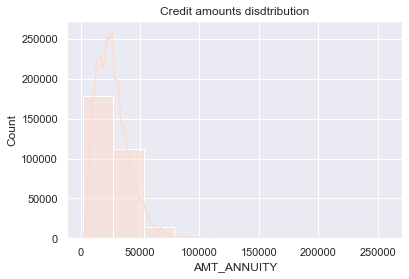

In [ ]:
%matplotlib inline
ax = sns.histplot(data = df_train, x = 'AMT_ANNUITY',  palette = 'Reds', bins = 10, kde= True)
sns.set_palette('Reds')
ax.set(title="Credit amounts disdtribution")

Now we are gonna plot the education level of the credit applicants and show the percentages of each category. And also print the total counts for each category.

[Text(0.5, 1.0, 'Eduction distribution')]

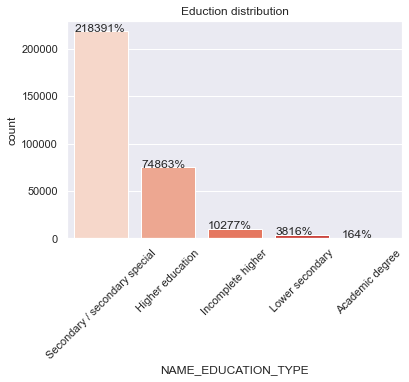

In [ ]:
# list with the education categories:
edu = df_train['NAME_EDUCATION_TYPE'].unique()

# amount in each category:
amt_edu = df_train['NAME_EDUCATION_TYPE'].value_counts() 

# percentage for each category:
l       = len(df_train)
per_edu = round((amt_edu*100 )/l,2)

%matplotlib inline


sns.set(style='darkgrid')

ax = sns.countplot(x = 'NAME_EDUCATION_TYPE', palette= 'Reds', data = df_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
#ax.set_ylim(0,100)

for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)


ax.set(title="Eduction distribution")

In [ ]:
print('Total counts for each category: ', amt_edu)

Total counts for each category:  Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


3- Plot the distribution of ocupation of the loan applicants

[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Sales staff'),
 Text(2, 0, 'Core staff'),
 Text(3, 0, 'Managers'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'High skill tech staff'),
 Text(6, 0, 'Accountants'),
 Text(7, 0, 'Medicine staff'),
 Text(8, 0, 'Security staff'),
 Text(9, 0, 'Cooking staff'),
 Text(10, 0, 'Cleaning staff'),
 Text(11, 0, 'Private service staff'),
 Text(12, 0, 'Low-skill Laborers'),
 Text(13, 0, 'Waiters/barmen staff'),
 Text(14, 0, 'Secretaries'),
 Text(15, 0, 'Realty agents'),
 Text(16, 0, 'HR staff'),
 Text(17, 0, 'IT staff')]

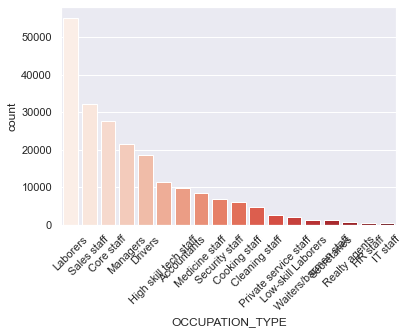

In [ ]:
%matplotlib inline

sns.set(style='darkgrid')

ax = sns.countplot(x = 'OCCUPATION_TYPE', palette= 'Reds',
              data = df_train,
              order = df_train['OCCUPATION_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


Plot the family status of the applicants

[Text(0, 0, 'Married'),
 Text(1, 0, 'Single / not married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Separated'),
 Text(4, 0, 'Widow'),
 Text(5, 0, 'Unknown')]

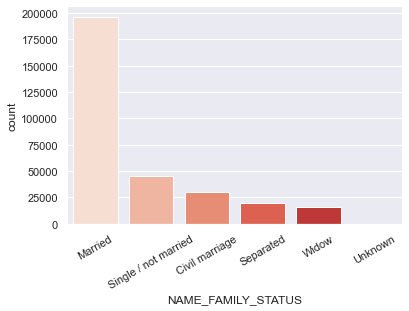

In [ ]:
### Complete in this cell: family status
%matplotlib inline
ax = sns.countplot(data = df_train, x='NAME_FAMILY_STATUS' ,palette= 'Reds', order = ['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow', 'Unknown'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


The income type of applicants grouped by the target variable

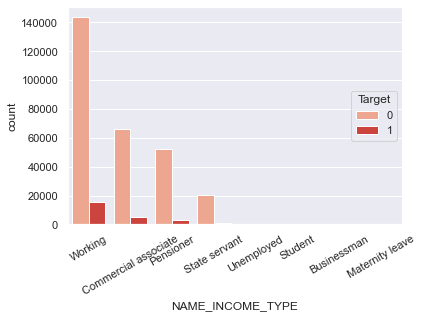

In [ ]:
%matplotlib inline
ax = sns.countplot(data = df_train, x = "NAME_INCOME_TYPE", palette= 'Reds', hue="TARGET" , order = ['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Student', 'Businessman', 'Maternity leave'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
##place legend in center right of plot
ax.legend(loc='center right', title='Target')




Correlation analysis


In [20]:
df_corr = df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE','OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
        'HOUSETYPE_MODE', 'TOTALAREA_MODE']]

Text(0.5, 1.0, 'Correlation Heatmap')

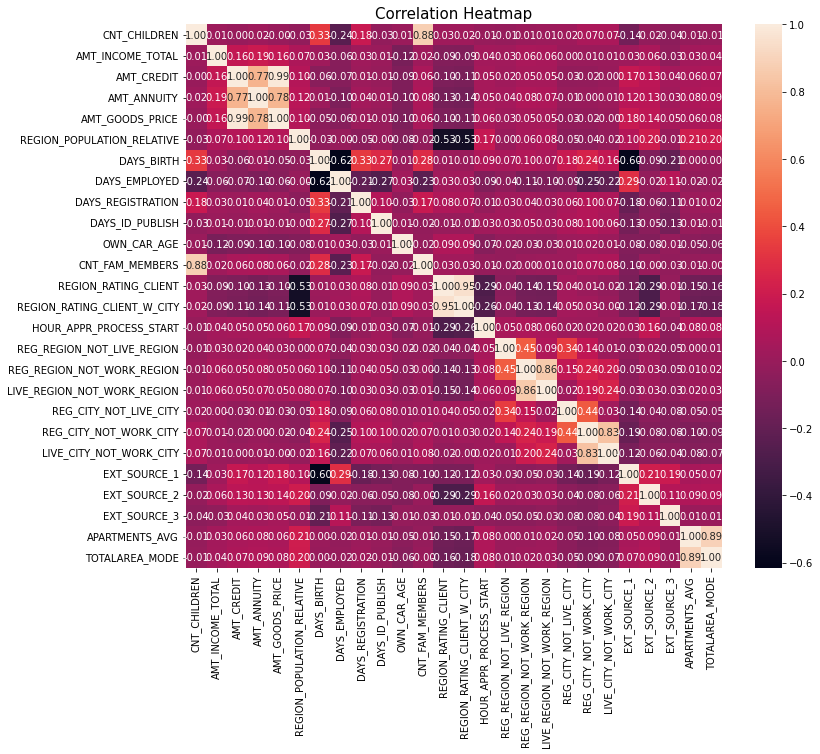

In [25]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df_corr.corr(), annot=True, fmt='.2f')
ax.set_title('Correlation Heatmap', fontsize=15)


<Figure size 1008x1008 with 0 Axes>

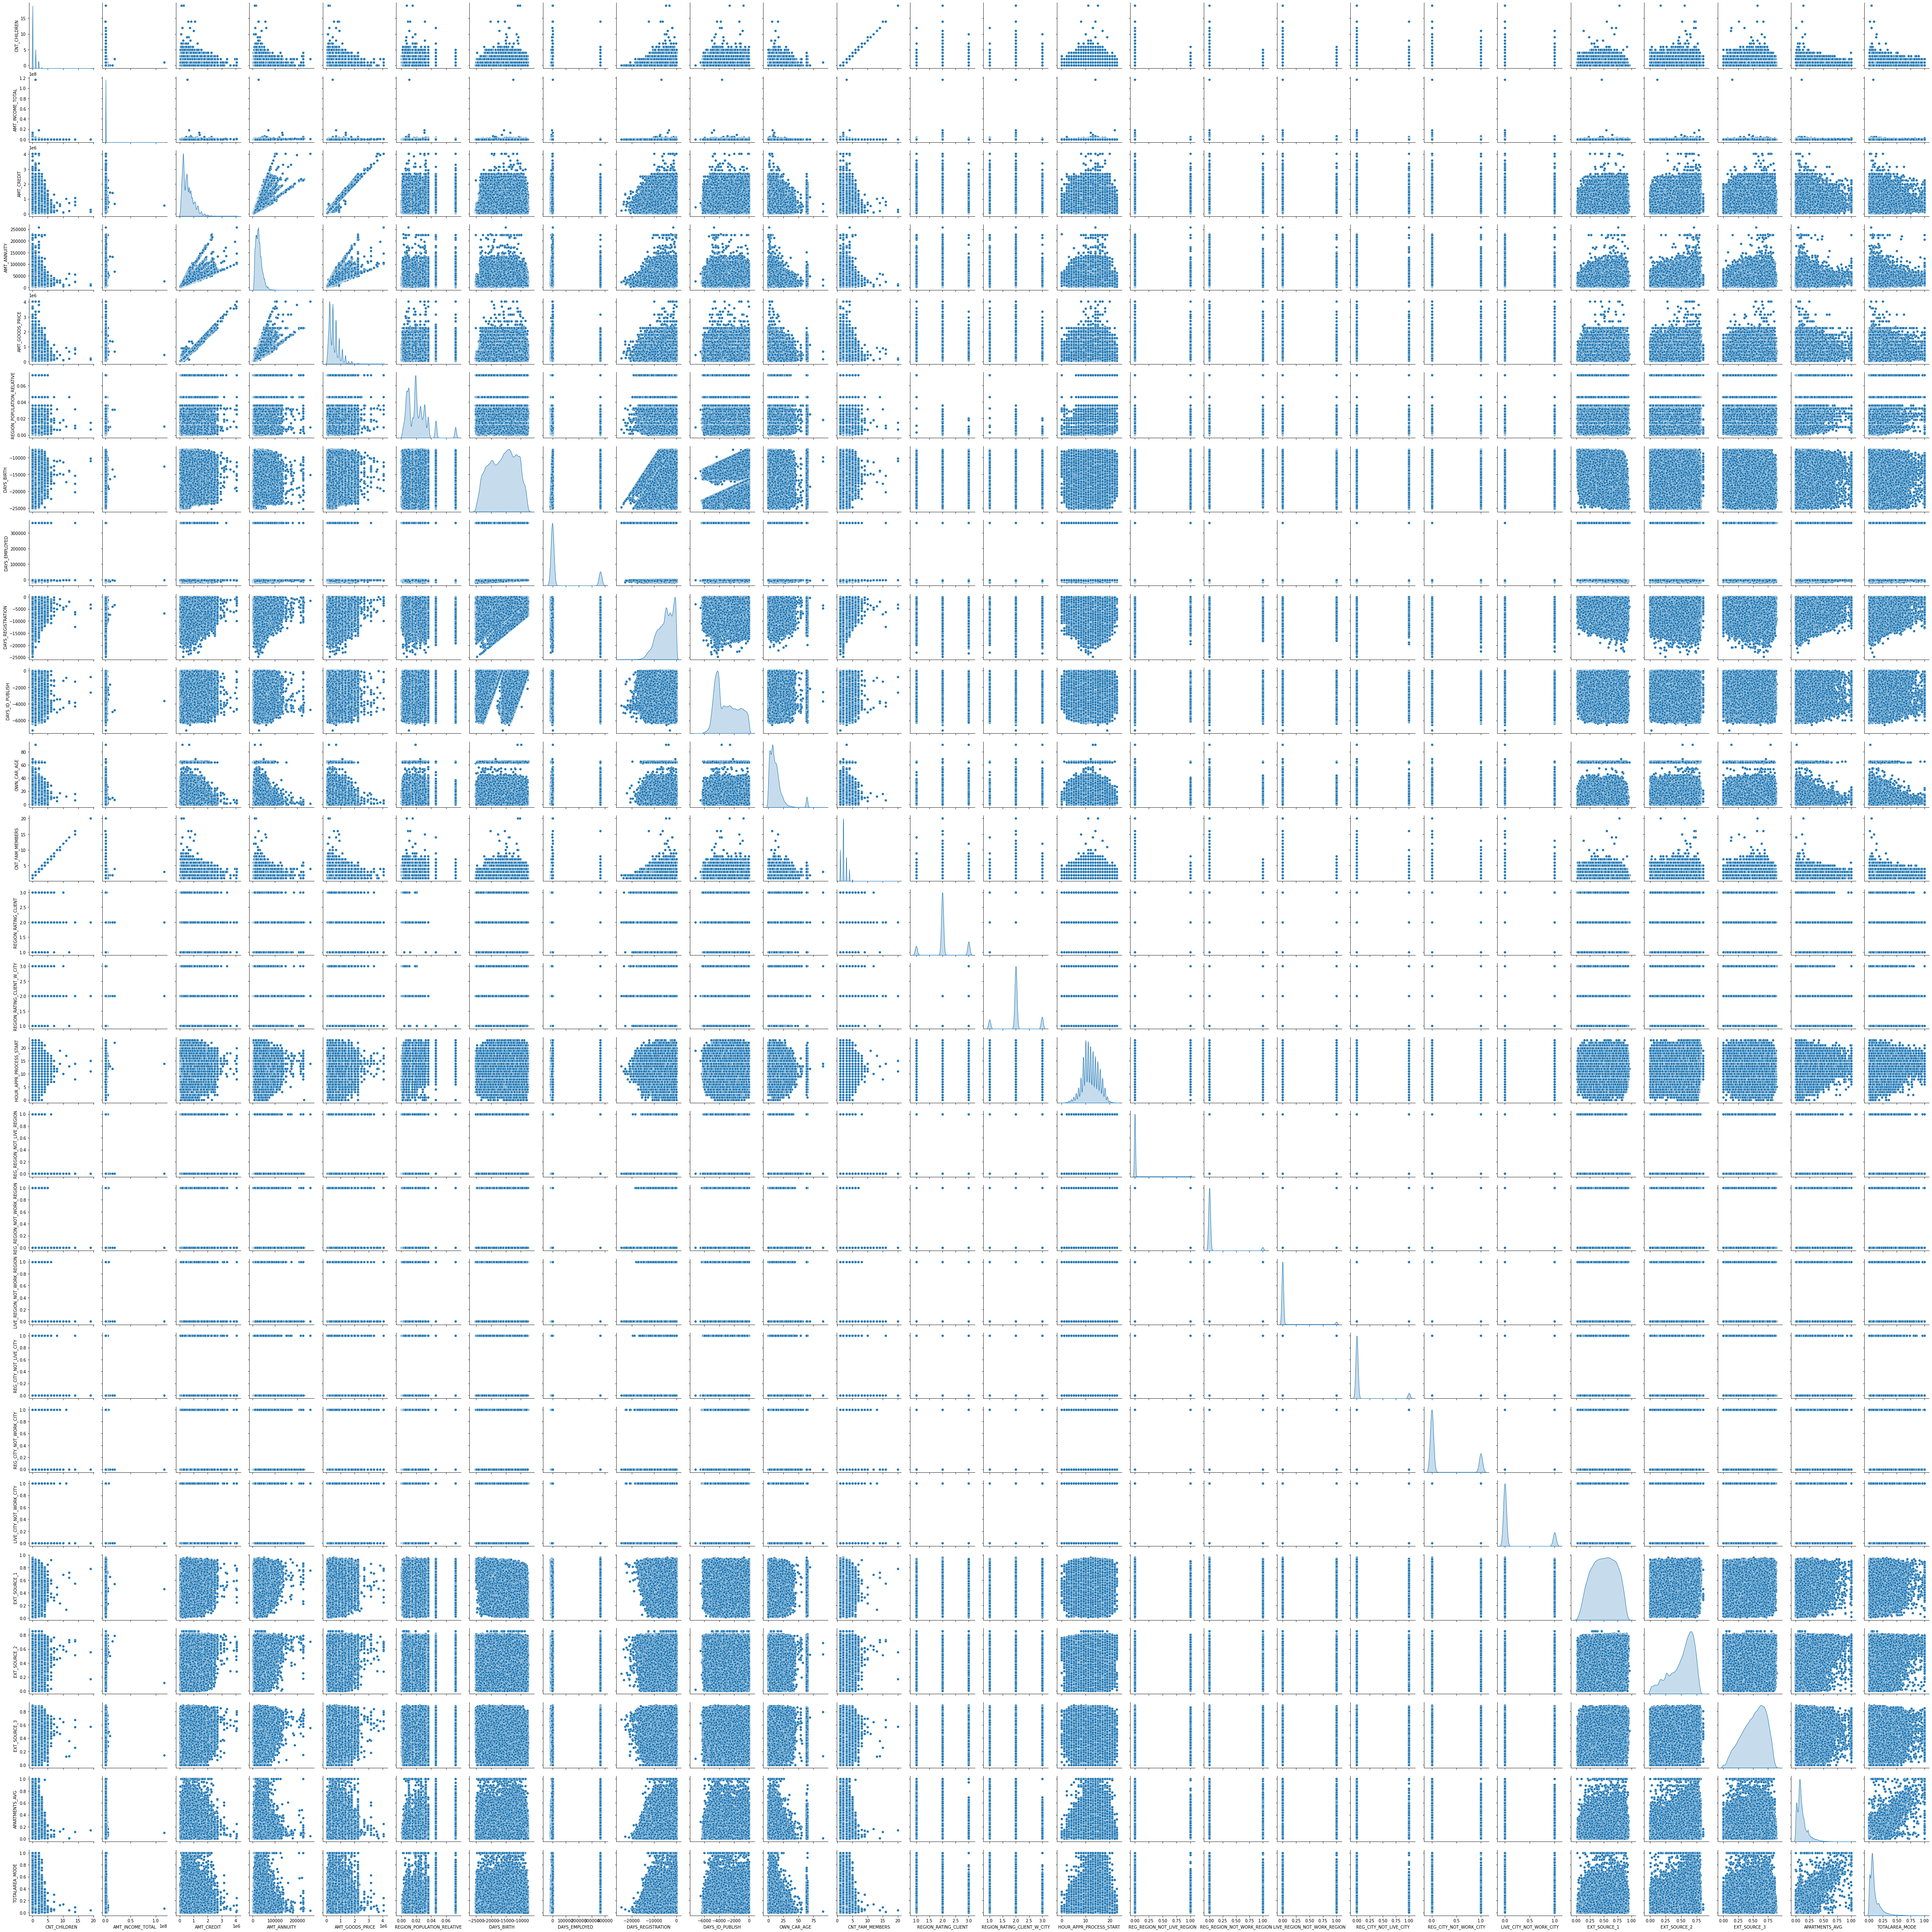

In [26]:
plt.figure(figsize=(14, 14))
ax = sns.pairplot(df_corr, diag_kind='kde')

## Preprocessing

In this section, we will code a function to make all the data pre processing for the dataset. 
We want to deliver is a function that takes the train and test dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training. Remember ML models take numpy arrays as inputs!

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns

I dont use the target or  column

In [108]:
df_train_o = pd.read_csv('application_train.csv.zip', encoding='ISO-8859–1')
df_test_o  = pd.read_csv('application_test.csv.zip', encoding='ISO-8859–1')

In [129]:
df_train = df_train_o
df_test  = df_test_o

In [130]:
y_train = df_train_o['TARGET']

In [131]:
df_test['SK_ID_CURR']

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

In [132]:
df_train = df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
print(df_train.shape)

(307511, 120)


In [133]:
df_test = df_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
print(df_test.shape)

(48744, 120)


In [134]:
def outliers_to_median(df_train, list_outliers_features):
  for i in list_outliers_features:
    mean = df_train[i].mean()
    std  = df_train[i].std()
    low   = 0.25 * mean - 3 * std
    upp   = 0.75 * mean + 3 * std

    mask =  (df_train[i] < low) | (df_train[i] > upp)
    df_train.loc[mask,i] = df_train[i].median()

     
  return df_train

In [135]:
def days_employed_to_0(df_train): 
  # Special outliers 'DAYS_EMPLOYED':
  
  for i in range(df_train.shape[0]):
    if df_train['DAYS_EMPLOYED'][i] > 0: 
      df_train.loc[i,'DAYS_EMPLOYED'] = 0
  return df_train


In [136]:
def get_dum_cat_feat(df_train , df_test, list_features):

  df_train = pd.get_dummies(df_train, columns = list_features, drop_first = True)
  df_test  = pd.get_dummies(df_test, columns  = list_features, drop_first = True)
  
  return df_train,df_test

In [137]:
def num_scalin_minmax(df_train,df_test,num_features):  
  # 1) Call the scaler
  mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=False)

  # 2) fit:
  df_train[num_features] = mm_scaler.fit_transform(df_train[num_features])#.values.reshape(-1, 1))

  # 3) now on the test:
  df_test[num_features] = mm_scaler.transform(df_test[num_features])

  return df_train,df_test

In [138]:
def preprocessing( df_train, df_test):

  #cat_features = [i for i in df_train.columns if df_train.dtypes[i]=='object']
  
  cat_features = df_train.select_dtypes(include="object").columns.values
  num_features = df_train.select_dtypes(exclude="object").columns.values
  # 1) lets deal with this nans:
  # we call the imputer:

  imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
  
  # numerical:
  # fit and transform for the train:
  df_train[num_features] = imp_median.fit_transform(df_train[num_features])#.values.reshape(-1, 1))  
  
  # transform for the test:
  df_test[num_features]  = imp_median.transform(df_test[num_features])#.values.reshape(-1, 1))  

  imp_most_f = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  
  # categorical:
  # fit and transform:
  df_train[cat_features] = imp_most_f.fit_transform(df_train[cat_features])#.values.reshape(-1, 1))  
  # transform:
  df_test[cat_features]  = imp_most_f.transform(df_test[cat_features])#.values.reshape(-1, 1))
    
  # Dealing with special information, outliers and special outliers:

  # dealing with the XNA:
  
  mode_ot = df_train['ORGANIZATION_TYPE'].mode()[0]
  mode_cg = df_train['CODE_GENDER'].mode()[0]
  
  df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace('XNA',mode_ot)   
  df_test ['ORGANIZATION_TYPE'] = df_test ['ORGANIZATION_TYPE'].replace('XNA',mode_ot)   

  df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace('XNA',mode_cg)   
  df_test ['CODE_GENDER'] = df_test ['CODE_GENDER'].replace('XNA',mode_cg)   
  
  # Outliers: 
  list_outliers_features = ['AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
  df_train               = outliers_to_median(df_train, list_outliers_features)
  
  # Special outliers 'DAYS_EMPLOYED':
  df_train = days_employed_to_0(df_train)
    
  ## Encoding features that have 2 categories --> get_dummies
  
  ## More than 2 categories features --> get_dummies
  
  df_train = pd.get_dummies(df_train, drop_first = True)
  df_test  = pd.get_dummies(df_test, drop_first = True)
  
  # 5) Feature Scaling --> MinMax
  df_train,df_test = num_scalin_minmax(df_train,df_test,num_features)
  

  return df_train,df_test

In [139]:
df_train , df_test = preprocessing( df_train, df_test)


C:\Users\User\AppData\Local\Temp\ipykernel_14644\1150168399.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_features] = imp_median.fit_transform(df_train[num_features])#.values.reshape(-1, 1))
C:\Users\User\AppData\Local\Temp\ipykernel_14644\1150168399.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_features]  = imp_median.transform(df_test[num_features])#.values.reshape(-1, 1))
C:\Users\User\AppData\Local\Temp\ipykernel_14644\1150168399.py:23: SettingWithCopyWarning: 
A v

In [140]:
df_train['SK_ID_CURR'] = df_train_o['SK_ID_CURR']
df_test ['SK_ID_CURR'] = df_test_o['SK_ID_CURR']

C:\Users\User\AppData\Local\Temp\ipykernel_14644\773429011.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['SK_ID_CURR'] = df_train_o['SK_ID_CURR']
C:\Users\User\AppData\Local\Temp\ipykernel_14644\773429011.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test ['SK_ID_CURR'] = df_test_o['SK_ID_CURR']


In [141]:
df_test,df_train = df_test.align(df_train, join = 'inner', fill_value = 0, axis =1)

In [142]:
print(df_train.shape,df_test.shape)

(307511, 225) (48744, 225)


## Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

### Baseline: LogisticRegression

In [145]:
x_train = df_train
x_test  = df_test

In [146]:
# 1) we call the model:
l_regressor =  LogisticRegression(max_iter= 1500, C= 0.5)

# 2) train the model:
l_regressor.fit(x_train, y_train)

# 3) Predict_proba:
y_pred_proba_lg = l_regressor.predict_proba(x_test)[:, 1]


In [147]:
print(y_pred_proba_lg)

[0.29701404 0.29700685 0.29699246 ... 0.0192542  0.01925404 0.01924981]


Use the trained model to predict probabilites for the test data, and then save the results to a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities. REMEMBER: the TARGET columns should ONLY contain the probabilities that the debt is not repaid (equivalent to the class 1).

In [148]:
x_test['SK_ID_CURR']

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

In [150]:
lg_kaggle = pd.DataFrame()

lg_kaggle['SK_ID_CURR'] = x_test['SK_ID_CURR']
lg_kaggle['SK_ID_CURR'] = pd.to_numeric(lg_kaggle['SK_ID_CURR'], downcast='integer')
lg_kaggle['TARGET']     = y_pred_proba_lg

lg_kaggle.to_csv("l_regressor.csv", index=False)

Go to the Kaggle competition, and in the [submissions page](https://www.kaggle.com/competitions/home-credit-default-risk/submit) load your csv file. Report here the result in the private score you obtained.

At this point, the model should produce a result around 0.67 

Score: 0.49227
Public score: 0.49305


Lets see if we can improove those results:

In [151]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(x_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234)


In [155]:
# 1) we call the model:
l2_regressor =  LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234)

# 2) train the model:
l2_regressor.fit(x_train, y_train)

# 3) Predict_proba:
y_pred_proba_lg2 = l2_regressor.predict_proba(x_test)[:, 1]
lg2_kaggle       = pd.DataFrame()

lg2_kaggle['SK_ID_CURR'] = x_test['SK_ID_CURR']
lg2_kaggle['SK_ID_CURR'] = pd.to_numeric(lg2_kaggle['SK_ID_CURR'], downcast='integer')
lg2_kaggle['TARGET']     = y_pred_proba_lg2

lg2_kaggle.to_csv("l2_regressor.csv", index=False)

Ok... we improove a little bit
Score: 0.62807
Public score: 0.63522

### Training a Random Forest Classifier 

Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

In [156]:
%%time
## Baseline 
rfc0 = RandomForestClassifier()
# 2) we train it:.523

rfc0.fit(x_train,y_train)

# 3) we run it:
y_pred_proba_rfc = rfc0.predict_proba(x_test)[:, 1] 


CPU times: total: 6min 10s
Wall time: 6min 58s


In [157]:
rfc0_kaggle       = pd.DataFrame()

rfc0_kaggle['SK_ID_CURR'] = x_test['SK_ID_CURR']
rfc0_kaggle['SK_ID_CURR'] = pd.to_numeric(rfc0_kaggle['SK_ID_CURR'], downcast='integer')
rfc0_kaggle['TARGET']     = y_pred_proba_rfc

rfc0_kaggle.to_csv("rfc0_regressor.csv", index=False)

Score: 0.69195
Public score: 0.69391

### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc".

In [ ]:
%%time

rfc_rscv  = RandomForestClassifier() 

example_hyperparameter_grid = {
 'bootstrap':         [False],
 'max_depth':         [50, 100, None],
 'max_features':      ['sqrt'],
 'min_samples_leaf':  [2, 4],
 'min_samples_split': [50, 10],
 'n_estimators':      [500]
}

grid = RandomizedSearchCV(rfc_rscv, example_hyperparameter_grid, cv = 3, scoring = 'roc_auc', n_iter = 2 , n_jobs = -1, random_state = 0)
 
grid.fit(x_train , y_train)

best_estimator = grid.best_estimator_
print(best_estimator)

print(grid.best_score_)



/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=50,
                       n_estimators=500)
0.7382793235390279


2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [159]:
%%time
rfc_rscv = RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',min_samples_leaf=4, min_samples_split=50,n_estimators=500)
y_pred_proba_rfc_rds = rfc_rscv.fit(x_train,y_train)
y_pred_proba_rfc_rds = rfc_rscv.predict_proba(x_test)


CPU times: total: 38min 44s
Wall time: 45min 19s


In [160]:
rfc_rds_kaggle = pd.DataFrame()

rfc_rds_kaggle['SK_ID_CURR'] = x_test['SK_ID_CURR']
rfc_rds_kaggle['SK_ID_CURR'] = pd.to_numeric(lg_kaggle['SK_ID_CURR'], downcast='integer')
rfc_rds_kaggle['TARGET']     = y_pred_proba_rfc_rds[:, 1]

rfc_rds_kaggle.to_csv("rf_rds_classifier.csv", index=False)

Score: 0.72395
Public score: 0.72473

4- If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [161]:
!pip install wheel
!pip install lightgbm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 1.0/1.0 MB 4.0 MB/s eta 0:00:00


In [179]:
import lightgbm as lgb
from lightgbm                import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import roc_auc_score
import re

In [186]:
x2_train = x_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x2_test  = x_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [187]:
%%time
# Baseline:
lgb_model = LGBMClassifier()

lgb_model.fit(x2_train, y_train)

pred_lgb = lgb_model.predict_proba(x2_test)[:, 1] 



CPU times: total: 37.5 s
Wall time: 19.6 s


In [190]:
lgbm_kaggle = pd.DataFrame()

lgbm_kaggle['SK_ID_CURR'] = x_test['SK_ID_CURR']
lgbm_kaggle['SK_ID_CURR'] = pd.to_numeric(lgbm_kaggle['SK_ID_CURR'], downcast='integer')
lgbm_kaggle['TARGET']     = pred_lgb

lgbm_kaggle.to_csv("lgbm_classifier.csv", index=False)


Score: 0.74467
Public score: 0.74324

Now lets try tunning the model

In [197]:
%%time

lgb_model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=42, objective='binary', num_leaves=80)

lgb_model.fit(x2_train, y_train)

pred_lgb_h = lgb_model.predict_proba(x2_test)[:, 1] 

CPU times: total: 49.5 s
Wall time: 34.8 s


In [199]:
lgbmh_kaggle = pd.DataFrame()

lgbmh_kaggle['SK_ID_CURR'] = x_test['SK_ID_CURR']
lgbmh_kaggle['SK_ID_CURR'] = pd.to_numeric(lgbmh_kaggle['SK_ID_CURR'], downcast='integer')
lgbmh_kaggle['TARGET']     = pred_lgb_h

lgbmh_kaggle.to_csv("lgbmh_classifier.csv", index=False)

Score: 0.74159
Public score: 0.74302

### Optional: Using Scikit Learn Pipelines 

Reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

We are gonna use a sklearn Pipeline to automate the cleaning, standardizing and training :

In [205]:
from sklearn.pipeline      import Pipeline
from sklearn.compose       import make_column_selector as selector
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.compose       import ColumnTransformer

first we open the raw files;

In [204]:
x_train = pd.read_csv('application_train.csv.zip', encoding='ISO-8859–1')
x_test  = pd.read_csv('application_test.csv.zip', encoding='ISO-8859–1')


In [206]:
numeric_transformer     = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), 
                                      ("scaler", QuantileTransformer())])

categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                          ('encoder',OneHotEncoder(handle_unknown='ignore', drop="if_binary"))])

preprocessor            = ColumnTransformer(transformers=[("num", numeric_transformer,  selector(dtype_include=np.number)),
                                               ("cat", categorical_transformer, selector(dtype_include=object))])

pipe_model              = Pipeline(steps=[("preprocessor", preprocessor), 
                             ("classifier", LGBMClassifier(n_jobs=-1, random_state=8, n_estimators=95, objective="binary"))])

In [207]:
pipe_model.fit(x_train.drop(columns = ["TARGET","SK_ID_CURR"]), x_train["TARGET"])

pipe_pred = pipe_model.predict_proba(x_test.drop(columns=["SK_ID_CURR"]))[:,1]

x_test["TARGET"] = pipe_pred
resp = x_test[["SK_ID_CURR","TARGET"]]
resp.to_csv("lgbm.csv", index = False)
x_test.drop(columns = ["TARGET"], inplace=True)

Score: 0.74344
Public score: 0.74612